In [301]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None
sns.set_theme()
sns.set_style("whitegrid")


# Objective

The objective of this analysis is to practice the complete
data analysis workflow from start to finish using the
Online Retail dataset.

This includes:
- performing a structured Exploratory Data Analysis (EDA),
- understanding data quality, distributions, and relationships,
- identifying meaningful patterns,
- applying appropriate segmentation methods,
- and translating analytical findings into
  predictive thinking and prescriptive business insights.

The focus of this analysis is not on building machine learning models,
but on developing correct analytical thinking, terminology,
and business-oriented interpretation of data.

By the end of this analysis, I aim to clearly explain:
- how to explore data systematically (univariate, bivariate, multivariate),
- how and why segmentation is applied,
- what future behavior the data suggests (predictive thinking),
- and what actions could be recommended (prescriptive analysis).

## EDA (Explorary Data Analysis)

### Step 1: Understanding the Problem and the Data

The dataset represents transactions from an online retail company.

Each row corresponds to a product-level transaction.

Customers can place multiple orders over time.

The business goal is typically related to understanding customer behavior,
sales performance, and retention patterns.

### Step 2: Import and Inspect Data

In [212]:
df = pd.read_csv("../../datasets/online_retail.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [213]:
row = df.shape[0]
col = df.shape[1]
print(f"We have {row} rows, {col} columns")

We have 1067371 rows, 8 columns


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [215]:
df.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

In [216]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [217]:
df["InvoiceDate"].min(), df["InvoiceDate"].max()

('2009-12-01 07:45:00', '2011-12-09 12:50:00')

### Step 3: Handling Missing Values

In [218]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [219]:
negative_quantity = (df["Quantity"] <= 0).sum()
negative_price = (df["Price"] <= 0).sum()
print(f"We have {negative_price} negative price rows and {negative_quantity} negative quantity rows")

We have 6207 negative price rows and 22950 negative quantity rows


In [220]:
print(f"We have {df.duplicated().sum()} duplicated rows")

We have 34335 duplicated rows


#### Observations

We have invalid values for Quantity and Price columns

We have NaN values for Description and Customer ID

We have 34335 duplicated rows

So for the future data analysis, we need to eliminate those.

In [221]:
df = df[(df["Quantity"] > 0) & (df["Price"] > 0)]
df.dropna(subset=["Customer ID"], inplace=True)
df.drop_duplicates(inplace=True)
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

### Step 4: Explore Data Characteristics

In [222]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [223]:
df["Customer ID"] = df["Customer ID"].astype(int)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID             int64
Country                object
dtype: object

### Step 5: Perform Data Transformation

In [224]:
df.rename(columns={"Price": "UnitPrice", "Customer ID": "CustomerID"}, inplace=True)
df["TotalPrice"]=df["UnitPrice"] * df["Quantity"]
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df["Year"] = df["InvoiceDate"].dt.year
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,12,1,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,1,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,1,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,12,1,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,12,1,2009


### Step 6: Visualize Data Relationships

#### Step 6.1. Univariate Analysis

Univariate analysis focuses on examining one variable at a time
in order to understand its distribution, range, and potential anomalies.
The goal is to describe individual variables without considering
relationships between them.

##### <b>Analysis 1: Distribution of Numericals and Categoricals<b>

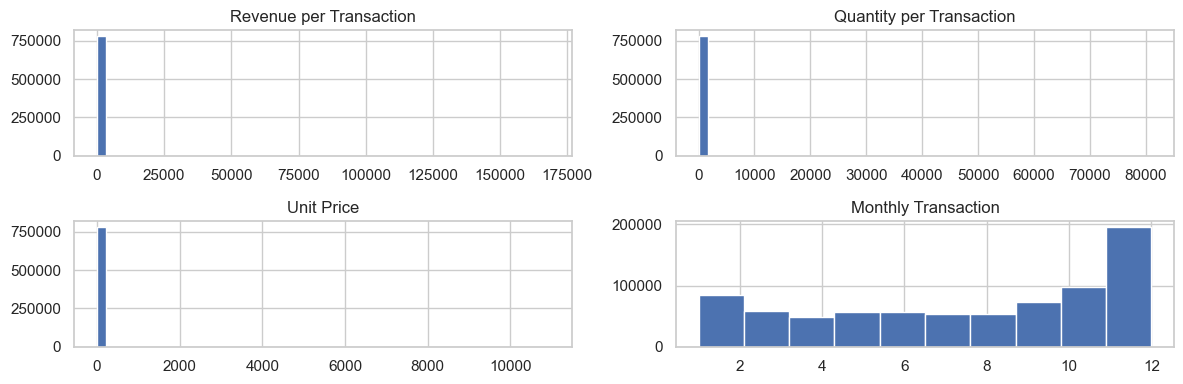

In [225]:
fig, axes = plt.subplots(2, 2, figsize=(12, 4))

axes[0][0].hist(df["TotalPrice"], bins=50)
axes[0][0].set_title("Revenue per Transaction")

axes[0][1].hist(df["Quantity"], bins=50)
axes[0][1].set_title("Quantity per Transaction")

axes[1][0].hist(df["UnitPrice"], bins=50)
axes[1][0].set_title("Unit Price")

axes[1][1].hist(df["Month"])
axes[1][1].set_title("Monthly Transaction")

plt.tight_layout()
plt.show()

##### Summary

In [226]:
df[["TotalPrice", "Quantity", "UnitPrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalPrice,779425.0,22.291823,227.427075,0.001,4.95,12.48,19.80,168469.6
Quantity,779425.0,13.489370,145.855814,1.000,2.00,6.00,12.00,80995.0
UnitPrice,779425.0,3.218488,29.676140,0.001,1.25,1.95,3.75,10953.5


#### Step 6.2. Bivariate Analysis

Bivariate analysis examines the relationship between two variables
to understand how changes in one variable are associated with
changes in another.

The goal is to identify patterns, associations, and contrasts —
not to explain causality or make decisions.

##### <b>Analysis 1: Time vs Revenue</b>
##### Revenue varies substantially over time, with clear peaks and troughs, suggesting seasonal behavior.

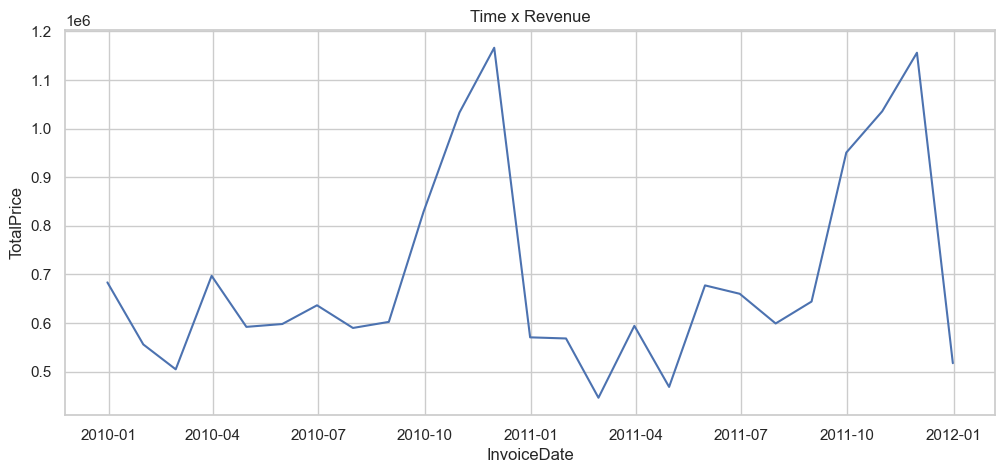

In [277]:
time_revenue_by_month = (df
    .set_index("InvoiceDate")
    .resample("ME")["TotalPrice"]
    .sum()).reset_index()

fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=time_revenue_by_month, x="InvoiceDate", y="TotalPrice", ax=ax)
plt.title("Time x Revenue")
plt.show()

##### <b>Analysis 2: Customer Frequency vs Revenue</b>

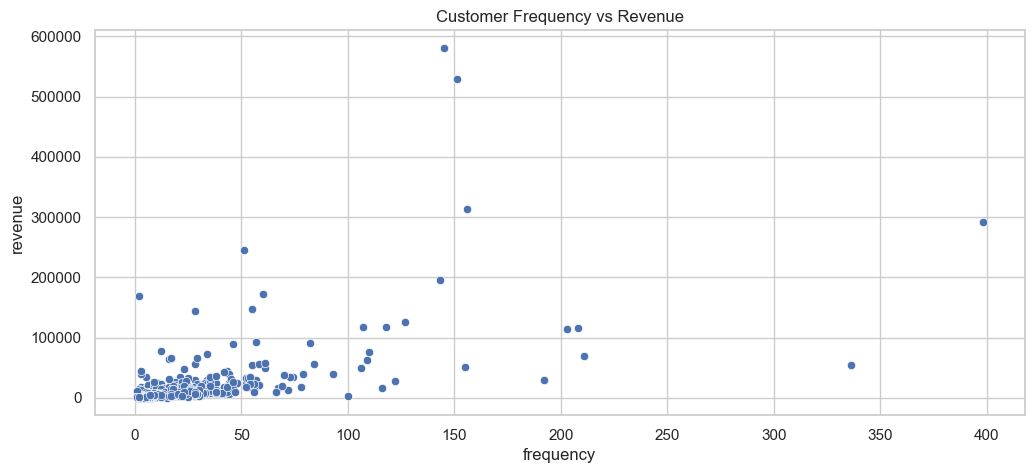

In [276]:
customer_frequency_by_revenue = (
    df.groupby("CustomerID").agg(
        frequency = ("Invoice", "nunique"),
        revenue = ("TotalPrice", "sum"),
    )
)
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(data=customer_frequency_by_revenue, x="frequency", y="revenue")
plt.title("Customer Frequency vs Revenue")
plt.show()

##### <b>Analysis 3: Customer Type vs Revenue</b>

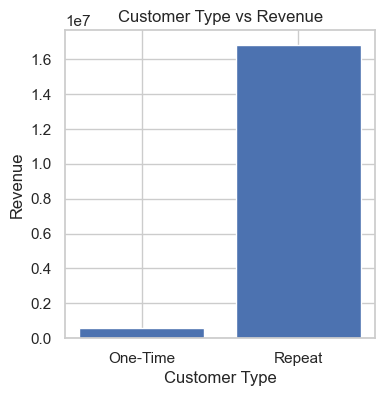

In [275]:
customer_frequency_by_revenue = (
    df.groupby("CustomerID").agg(
        invoice = ("Invoice", "nunique"),
        revenue = ("TotalPrice", "sum"),
    )
)
customer_frequency_by_revenue["type"] = customer_frequency_by_revenue["invoice"].apply(lambda x: "One-Time" if x == 1 else "Repeat")
customer_type_by_revenue = customer_frequency_by_revenue.groupby("type")["revenue"].sum().reset_index()
fig, ax = plt.subplots(figsize=(4, 4))
plt.bar(customer_type_by_revenue["type"], customer_type_by_revenue["revenue"])
plt.xlabel("Customer Type")
plt.ylabel("Revenue")
plt.title("Customer Type vs Revenue")

plt.show()

#### Step 6.3. Multivariate Analysis
Multivariate analysis examines how multiple variables interact
simultaneously. Unlike bivariate analysis, which focuses on pairwise
relationships, multivariate analysis helps uncover interaction effects
that are not visible when variables are analyzed in isolation.

##### <b>Analysis 1: Time × Customer Behavior × Revenue</b>

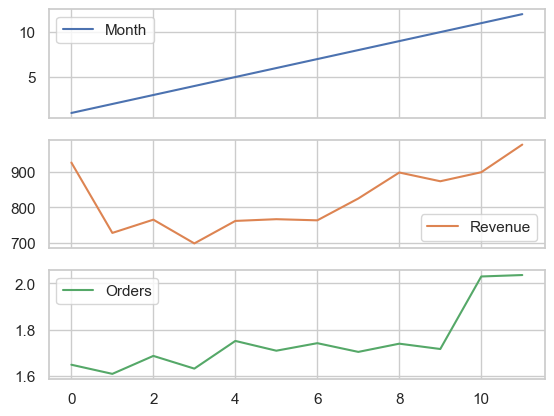

In [291]:
customer_month = (
    df.groupby(["CustomerID", "Month"])
      .agg(
          revenue=("TotalPrice", "sum"),
          orders=("Invoice", "nunique")
      )
      .reset_index()
)
monthly_behavior = (
    customer_month.groupby(["Month"])
      .agg(
          Revenue=("revenue", "mean"),
          Orders=("orders", "mean")
      )
      .reset_index()
)
monthly_behavior.plot(subplots=True)
plt.show()

### Step 7: Handling Outliers

Outliers were identified using the IQR method.
Values below Q1 − 1.5×IQR or above Q3 + 1.5×IQR
were flagged as potential outliers.

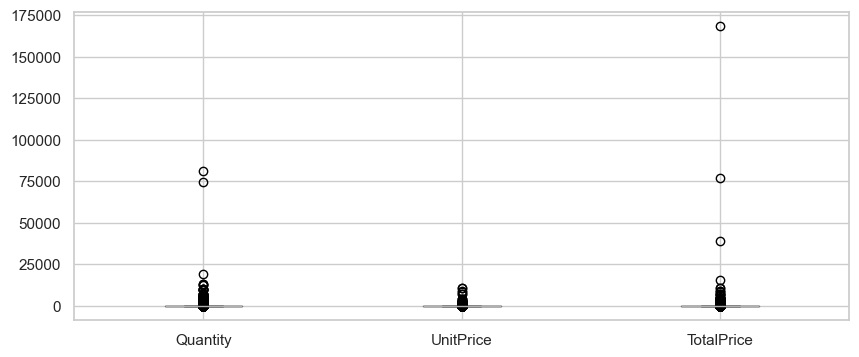

In [299]:
df[["Quantity", "UnitPrice", "TotalPrice"]].boxplot(figsize=(10, 4))
plt.show()

In [316]:
q1_quantity = df["Quantity"].quantile(0.25)
q3_quantity = df["Quantity"].quantile(0.75)

iqr = q3_quantity - q1_quantity
low_quantity = q1_quantity - iqr * 1.5
high_quantity = q3_quantity + iqr * 1.5
quantity_mask = (df["Quantity"] < low_quantity) | (df["Quantity"] > high_quantity)
outliers_quantity = df[quantity_mask]
print(f"Dataset has {outliers_quantity.shape[0]} of {df.shape[0]} quantity outliers")

Dataset has 51119 of 779425 quantity outliers


In [317]:
q1_total_price = df["TotalPrice"].quantile(0.25)
q3_total_price = df["TotalPrice"].quantile(0.75)

iqr = q3_total_price - q1_total_price
low_total_price = q1_total_price - iqr * 1.5
high_total_price = q3_total_price + iqr * 1.5
total_price_mask = (df["TotalPrice"] < low_total_price) | (df["TotalPrice"] > high_total_price)
total_price_quantity = df[total_price_mask]
print(f"Dataset has {total_price_quantity.shape[0]} of {df.shape[0]} total price outliers")

Dataset has 63562 of 779425 total price outliers


## Segmentation

### Behavioral Segmentation

Behavioral segmentation groups customers based on how they interact
with the business, rather than who they are demographically.
In transactional datasets, behavior is inferred from purchasing patterns
such as frequency, recency, and spending.

##### <b>Analysis 1: Frequency Segment<b>

What is the frequency purchase of each customer?

In [329]:
freq_segment = (
    df.groupby("CustomerID").agg(frequency = ("Invoice", "nunique")).reset_index()
)
Q1 = freq_segment["frequency"].quantile(0.25)
Q3 = freq_segment["frequency"].quantile(0.75)

def frequency_segment(x):
    if x <= Q1:
        return "Low Frequency"
    elif x <= Q3:
        return "Mid Frequency"
    else:
        return "High Frequency"

freq_segment["FrequencySegment"] = freq_segment["frequency"].apply(frequency_segment)
freq_segment

,CustomerID,frequency,FrequencySegment
0,12346,12,High Frequency
1,12347,8,High Frequency
2,12348,5,Mid Frequency
3,12349,4,Mid Frequency
4,12350,1,Low Frequency
...,...,...,...
5873,18283,22,High Frequency
5874,18284,1,Low Frequency
5875,18285,1,Low Frequency
5876,18286,2,Mid Frequency


##### <b>Analysis 2: Revenue Segment<b>

How much value does the customer generate?

In [331]:
revenue_segment = (
    df.groupby("CustomerID").agg(revenue = ("TotalPrice", "sum")).reset_index()
)
Q1 = revenue_segment["revenue"].quantile(0.25)
Q3 = revenue_segment["revenue"].quantile(0.75)

def rev_segment(x):
    if x <= Q1:
        return "Low Value"
    elif x <= Q3:
        return "Mid Value"
    else:
        return "High Value"

revenue_segment["RevenueSegment"] = revenue_segment["revenue"].apply(rev_segment)
revenue_segment

,CustomerID,revenue,RevenueSegment
0,12346,77556.46,High Value
1,12347,4921.53,High Value
2,12348,2019.40,Mid Value
3,12349,4428.69,High Value
4,12350,334.40,Low Value
...,...,...,...
5873,18283,2664.90,High Value
5874,18284,461.68,Mid Value
5875,18285,427.00,Mid Value
5876,18286,1296.43,Mid Value


##### <b>Analysis 3: Recency Segment<b>

How recently did the customer interact?

In [338]:
latest_recency = df["InvoiceDate"].max()
recency_segment = (
    df.groupby("CustomerID").agg(latest_recency=("InvoiceDate", "max"))
)
recency_segment["Recency Gap"] = (latest_recency - recency_segment["latest_recency"]).dt.days

Q1 = recency_segment["Recency Gap"].quantile(0.25)
Q3 = recency_segment["Recency Gap"].quantile(0.75)

def rec_segment(x):
    if x <= Q1:
        return "Active Customer"
    elif x <= Q3:
        return "At-risk Customer"
    else:
        return "Inactive Customer"

recency_segment["RecencySegment"] = recency_segment["Recency Gap"].apply(rec_segment)
recency_segment

,latest_recency,Recency Gap,RecencySegment
CustomerID,,,
12346,2011-01-18 10:01:00,325,At-risk Customer
12347,2011-12-07 15:52:00,1,Active Customer
12348,2011-09-25 13:13:00,74,At-risk Customer
12349,2011-11-21 09:51:00,18,Active Customer
12350,2011-02-02 16:01:00,309,At-risk Customer
...,...,...,...
18283,2011-12-06 12:02:00,3,Active Customer
18284,2010-10-04 11:33:00,431,Inactive Customer
18285,2010-02-17 10:24:00,660,Inactive Customer


### RFM Segmentation

RFM segmentation is a structured behavioral framework that
combines three key dimensions of customer behavior:
Recency, Frequency, and Monetary value.

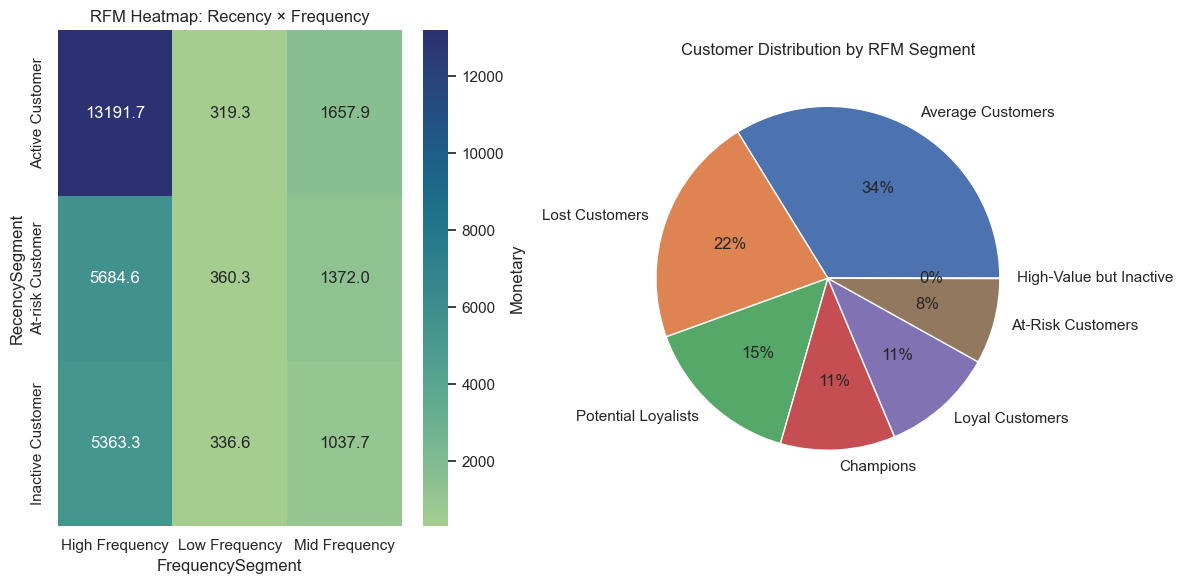

In [409]:
rfm = freq_segment.merge(
    revenue_segment,
    on="CustomerID",
    how="left"
)
rfm = rfm.merge(
    recency_segment,
    on="CustomerID",
    how="left"
)


def apply_score(x):
    if x in ["High Frequency","High Value", "Active Customer"]:
        return 1
    elif x in ["Mid Frequency","Mid Value", "At-risk Customer"]:
        return 2
    else:
        return 3
rfm["frequency_score"] = rfm["FrequencySegment"].apply(apply_score)
rfm["revenue_score"] = rfm["RevenueSegment"].apply(apply_score)
rfm["recency_score"] = rfm["RecencySegment"].apply(apply_score)
rfm["rfm_code"] = (
    rfm["frequency_score"].astype(str) +
    rfm["revenue_score"].astype(str) +
    rfm["recency_score"].astype(str)
)

def rfm_segment(code):
    if code == "111":
        return "Champions"

    elif code in ["112", "121", "211"]:
        return "Loyal Customers"

    elif code in ["122", "212", "221"]:
        return "Potential Loyalists"

    elif code in ["131", "132"]:
        return "High-Value but Inactive"

    elif code in ["213", "223", "312"]:
        return "At-Risk Customers"

    elif code in ["333", "323", "332"]:
        return "Lost Customers"

    else:
        return "Average Customers"

rfm["rfm_segment"] = rfm["rfm_code"].apply(rfm_segment)
rfm_heatmap = rfm.groupby(["RecencySegment", "FrequencySegment"]).agg(
    monetary=("revenue", "mean"),
    customer_count=("CustomerID", "count")
).reset_index()
rfm_heatmap_matrix = rfm_heatmap.pivot(
    index="RecencySegment",
    columns="FrequencySegment",
    values="monetary"
)
rfm_pie = rfm["rfm_segment"].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(rfm_heatmap_matrix, annot=True, cmap="crest", fmt=".1f", cbar_kws={'label': 'Monetary'}, ax=axs[0])
axs[1].pie(
    rfm_pie.values,
    labels=rfm_pie.index,
    autopct='%.0f%%',
)
axs[0].set_title("RFM Heatmap: Recency × Frequency")

axs[1].set_title("Customer Distribution by RFM Segment")

plt.tight_layout()

plt.show()